In [ ]:
import sklearn
assert sklearn.__version__ >= '1.1'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load data
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=70, resize=0.4, funneled=False)

In [ ]:
print(f"- Images shape: {faces.images.shape}")
print(f"- Data (flattened images) shape: {faces.data.shape}")
print(f"- Target shape: {faces.target.shape}")
print(f"- Number of classes: {np.unique(faces.target).shape}")
print(f"- Each class is a famous person: {', '.join(faces.target_names)}")

- Images shape: (1288, 50, 37)
- Data (flattened images) shape: (1288, 1850)
- Target shape: (1288,)
- Number of classes: (7,)
- Each class is a famous person: Ariel Sharon, Colin Powell, Donald Rumsfeld, George W Bush, Gerhard Schroeder, Hugo Chavez, Tony Blair


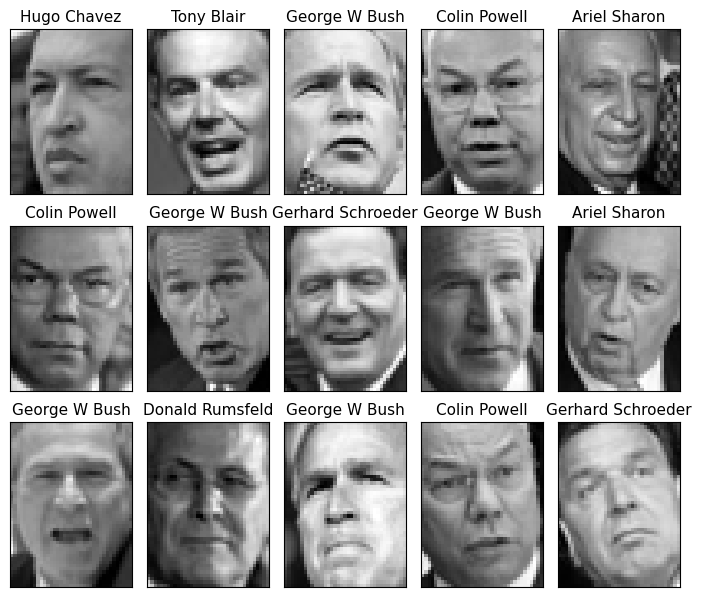

In [ ]:
fig = plt.figure(figsize=(7,10))
for i in range(15):
  plt.subplot(5, 5, i + 1)
  plt.title(faces.target_names[faces.target[i]], size = 11)
  plt.imshow(faces.images[i],cmap = plt.cm.gray)
  plt.xticks(())
  plt.yticks(())

plt.tight_layout()

In [ ]:
from sklearn.decomposition import PCA
pca1 = PCA(n_components=150)
pca = pca1.fit(faces.data)
data_projected = pd.DataFrame(pca.transform(faces.data))

In [ ]:
data_projected

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,1.619438,-1.507714,0.037038,0.357535,-0.483417,-0.401036,-0.206893,-0.894972,0.271276,0.212933,...,-0.025012,0.077800,0.378895,-0.040273,-0.125981,0.097440,0.077556,0.084398,0.024351,-0.087875
1,-2.160828,-3.241628,-0.606050,-0.876694,1.176248,2.169049,-0.063073,-1.268055,0.021314,-1.990508,...,-0.227234,-0.167300,0.106242,-0.087315,0.177115,0.159596,-0.308028,0.306856,-0.057070,-0.146794
2,2.572258,-0.457772,1.035992,1.249724,0.264293,0.127726,-0.411194,1.043924,0.420280,-1.483852,...,0.132664,0.144067,-0.136728,0.044550,-0.116728,-0.115488,-0.145266,0.155921,-0.089970,-0.075727
3,-0.441694,-2.345078,0.197762,2.339198,1.574506,-0.724248,0.014995,-1.450699,0.659767,0.763942,...,-0.081844,0.150105,0.159830,0.082256,0.089499,-0.040744,0.143970,-0.001726,-0.044393,-0.171794
4,-4.013416,1.930209,-2.679565,0.628568,-0.274251,-1.560866,-0.724083,0.586573,1.056070,0.480919,...,0.328361,-0.283865,-0.107348,-0.030467,-0.379301,-0.063381,0.250102,0.361822,-0.163037,-0.247040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1283,2.575272,-3.829705,3.750363,-2.063998,0.719956,2.036752,0.088300,-0.810855,1.078334,-0.758942,...,0.108838,0.076037,0.023905,-0.063359,-0.107546,-0.037258,-0.169615,-0.209476,0.062008,-0.109496
1284,-1.533724,-1.680012,3.250760,2.547065,-2.857023,-0.128600,0.179229,1.407629,-0.756009,-1.072941,...,0.047526,0.022792,-0.025289,0.088905,-0.055109,-0.197744,0.095238,0.127537,0.107091,-0.083917
1285,-3.755558,0.879366,-0.335874,0.779271,-0.746046,0.830225,-0.603178,-1.094072,0.136577,-0.829352,...,-0.169083,-0.007178,-0.056295,0.192145,0.084335,0.147072,-0.078268,0.073316,-0.037270,0.105331
1286,3.708679,-0.507156,-1.473879,-1.620681,-0.361709,-1.695721,1.409588,0.583047,-0.427702,0.458235,...,0.304862,-0.066973,0.091692,0.093527,0.044611,-0.158220,-0.106441,0.287291,-0.165190,-0.008639


In [ ]:
data_reconstructed = pca.inverse_transform(data_projected)
data_reconstructed.shape

(1288, 1850)

In [ ]:
print(np.array(data_reconstructed[1]).size)

1288


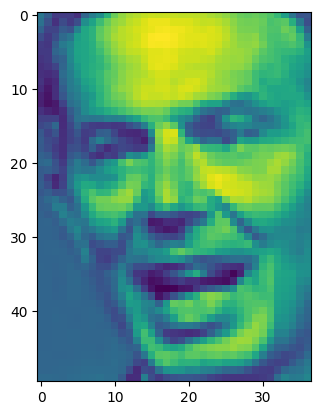

In [ ]:
plt.imshow(faces.images[1])

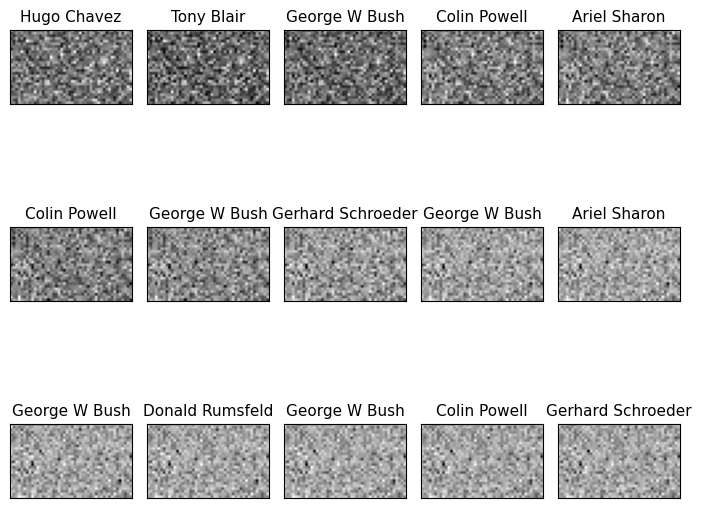

In [ ]:
fig = plt.figure(figsize=(7,10))
for i in range(15):
    plt.subplot(5, 5, i + 1)
    plt.title(faces.target_names[faces.target[i]], size=11)
    plt.imshow(np.array(data_reconstructed[i]).reshape((28, 46)), cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())

plt.tight_layout()

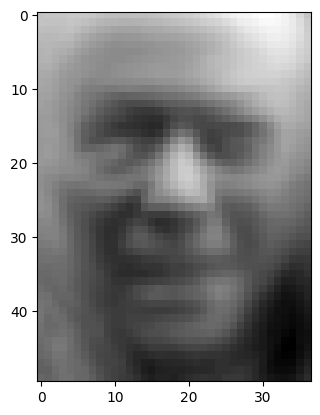

In [ ]:
for i in pca.components_[:5]:
    plt.imshow(i.reshape(50,37), cmap='gray' )

In [ ]:
pca.components_[0].shape

(1850,)

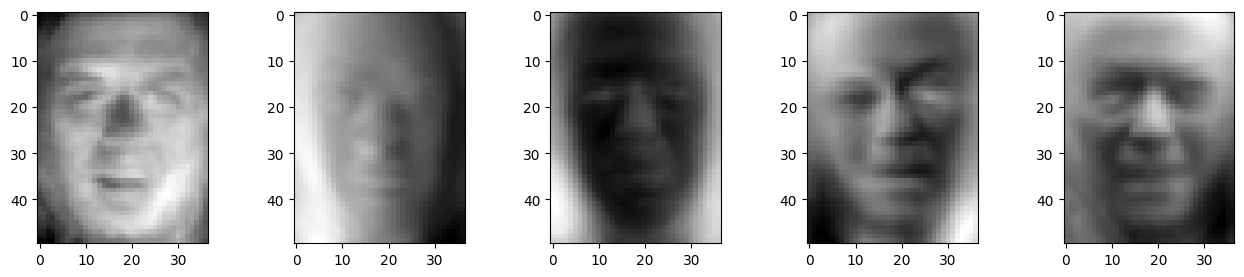

In [ ]:
fig,axs = plt.subplots(1,5, figsize=(16,3))
axs[0].imshow(pca.components_[0].reshape(50,37), cmap='gray')
axs[1].imshow(pca.components_[1].reshape(50,37), cmap='gray')
axs[2].imshow(pca.components_[2].reshape(50,37), cmap='gray')
axs[3].imshow(pca.components_[3].reshape(50,37), cmap='gray')
axs[4].imshow(pca.components_[4].reshape(50,37), cmap='gray')

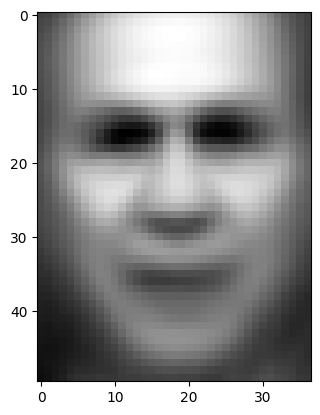

In [ ]:
plt.imshow(pca.mean_.reshape(50,37), cmap='gray' );

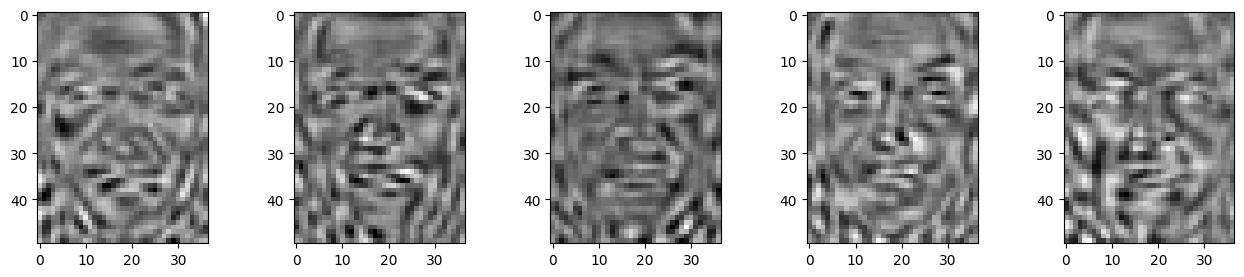

In [ ]:
fig, axs = plt.subplots(1, 5, figsize=(16, 3))
axs[0].imshow(pca.components_[-1].reshape(50,37), cmap='gray' );
axs[1].imshow(pca.components_[-2].reshape(50,37), cmap='gray' );
axs[2].imshow(pca.components_[-3].reshape(50,37), cmap='gray' );
axs[3].imshow(pca.components_[-4].reshape(50,37), cmap='gray' );
axs[4].imshow(pca.components_[-5].reshape(50,37), cmap='gray' );

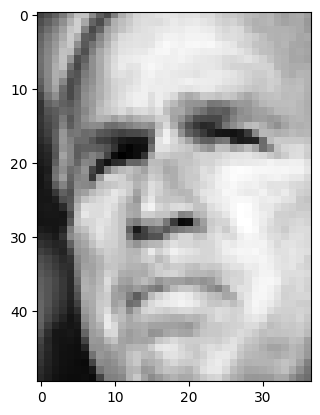

In [ ]:
# Every image can be represented by the "mean face" plus a linear combination of the 150 "PC faces"
# We do our reconstruction over the 13th image
image_original = faces.images[12]
image_compressed = data_projected[12]

plt.imshow(image_original, cmap='gray')

In [ ]:
# we start the reconstruction from the mean over all images
image_reconstructed = pca.mean_.copy()
reconstruction = list()
for i in range(pca.n_components_):
    image_reconstructed += pca.components_[i] * image_compressed[i]
    reconstruction.append(image_reconstructed.copy())

In [ ]:
image_compressed.shape

(1288,)

In [ ]:
pca.components_[0].shape

(1850,)

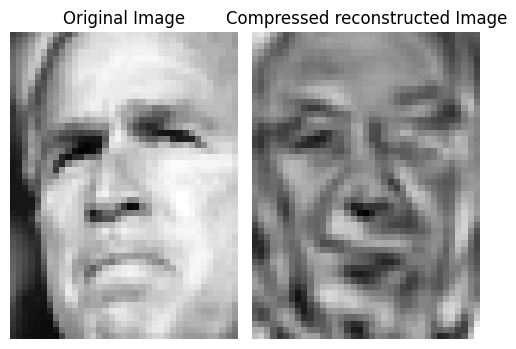

In [ ]:
# Plot the original and the compressed image.
fig, ax = plt.subplots(1, 2, figsize = (5,5))
ax[0].imshow(image_original, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(image_reconstructed.reshape(faces.images[0].shape), cmap='gray')
ax[1].set_title('Compressed reconstructed Image')
for ax in fig.axes:
    ax.axis('off')
plt.tight_layout()

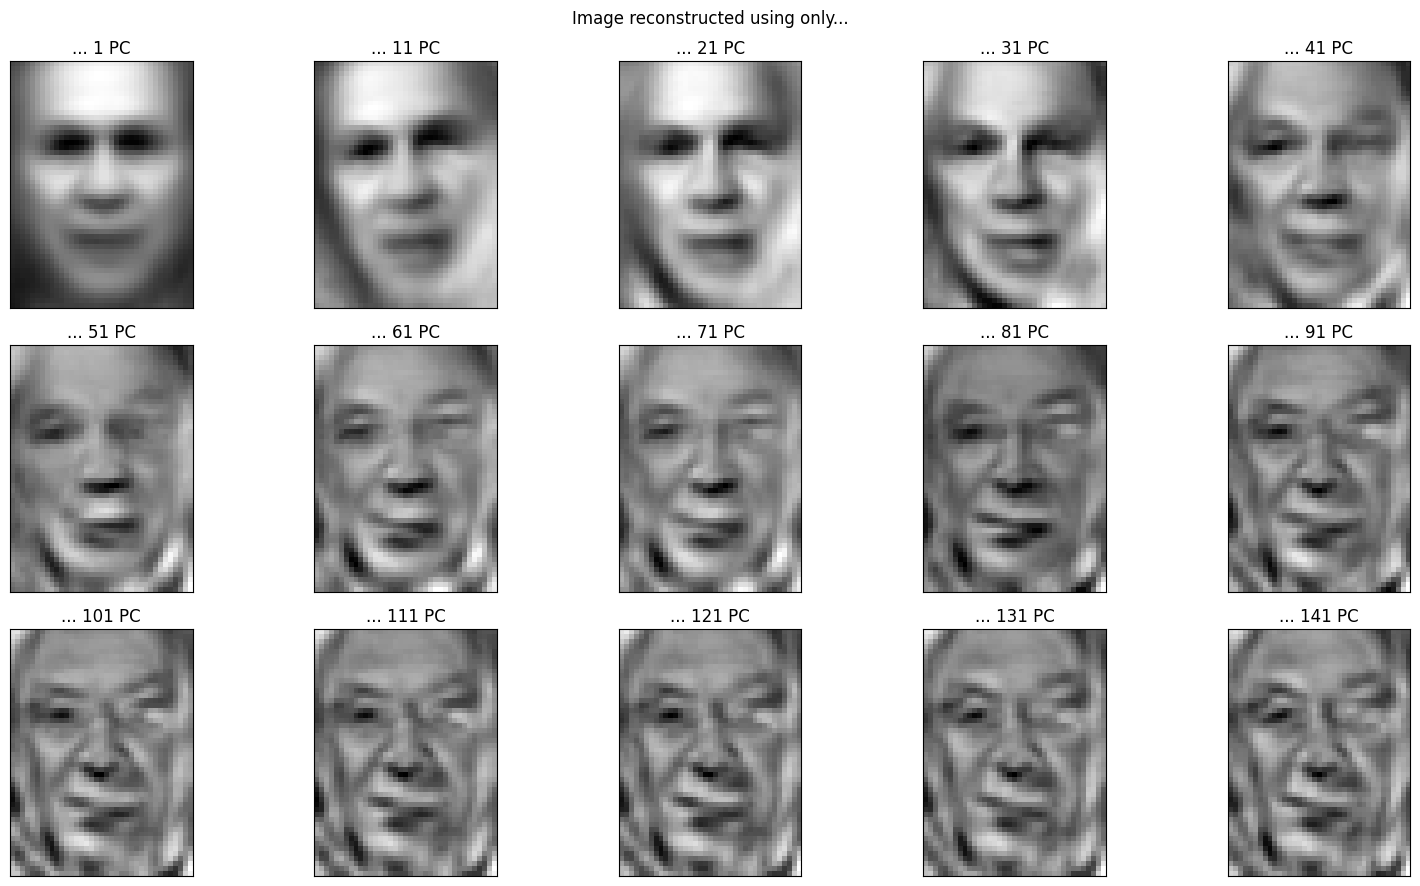

In [ ]:
# Plot several images at different steps of reconstruction
n_rows, n_cols = 3, 5
fig, axs = plt.subplots(n_rows, n_cols, figsize=(16, 9))
plt.suptitle('Image reconstructed using only...')

for i in range(n_rows * n_cols):
    ax = axs[i // n_cols, i % n_cols]
    ax.set_title(f'... {i * 10 + 1} PC', size=12)
    ax.set_xticks(()), ax.set_yticks(())
    ax.imshow(reconstruction[i * 10].reshape(50, 37), cmap='gray')

plt.tight_layout()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate a dataset with 100 observations and 2 correlated features.
seed = np.random.RandomState(42)
feature_1 = seed.normal(5, 1, 100)
feature_2 = .7 * feature_1 + seed.normal(0, .5, 100)
X = np.array([feature_1, feature_2]).T
X = pd.DataFrame(X)

X.corr().round(3)
X

,0,1
0,5.496714,3.140015
1,4.861736,3.192892
2,5.647689,3.782025
3,6.523030,4.164982
4,4.765847,3.255450
...,...,...
95,3.536485,2.668198
96,5.296120,3.265355
97,5.261055,3.759601
98,5.005113,3.532684


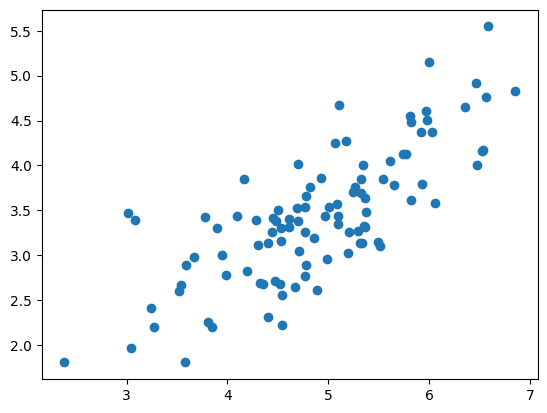

In [ ]:
plt.scatter(feature_1,feature_2)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [ ]:
pca.components_

array([[ 0.79286897,  0.60939216],
       [-0.60939216,  0.79286897]])

In [ ]:
pca.explained_variance_

array([1.2231014 , 0.15046893])

In [ ]:
pca.explained_variance_ratio_

array([0.89045415, 0.10954585])

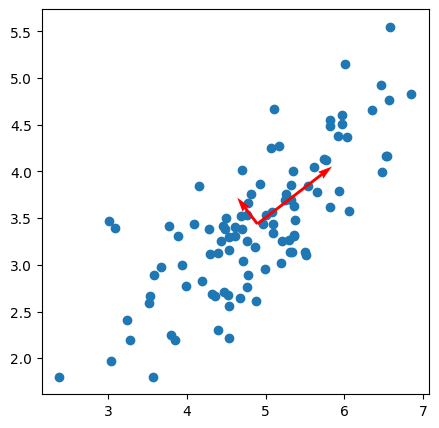

In [ ]:
plt.figure(figsize=(5,5))

plt.scatter(X[0], X[1])

for (length, vector) in zip(pca.explained_variance_, pca.components_):
    v = vector * np.sqrt(length) # Square root of their lenghts to compare same "units"
    plt.quiver(*X.mean(axis=0), *v, units='xy', scale=1, color='r')

In [ ]:
X.mean(axis=0)

,0
0,4.896153
1,3.438460


In [ ]:
np.sqrt(0.15046893)

0.3879032482462605

In [ ]:
0.15046893*-0.60939216

-0.0916945862655888

In [ ]:
0.15046893*0.79286897

0.1193021455461021

In [ ]:
import numpy as np


In [ ]:
np.exp(3.8)

44.701184493300815

In [ ]:
np.exp(4.1)

60.34028759736195

In [ ]:
np.exp(2.7)

14.879731724872837

In [ ]:
44.701184493300815+60.34028759736195+60.34028759736195+14.879731724872837

180.26149141289756

In [ ]:
44.701184493300815/180.26149141289756

0.2479796663332304

In [ ]:
round(0.2479796663332304,3)

0.248

In [ ]:
60.34028759736195/180.26149141289756

0.3347375366996695

In [ ]:
round(0.3347375366996695,3)

0.335